# 다중 클래스 분류

판별함수의 경우에는 종속변수가 multiclass일 경우 분석할 수 없으므로 multiclass classification을 할 수 있도록 만들어주어야 한다. 타겟 클래스가 2개 이상인 경우를 다중 클래스 분류(Multi-Class Classification) 문제라고 한다. 다중 클래스 분류 문제는 다음과 같이 여러개의 이진 클래스 분류(Binary Class Classification) 문제로 변환하여 해결한다.


## OvO (One-Vs-One) 

* $K$개의 타겟 클래스가 존재하는 경우, 
* 이 중 2개의 클래스 조합을 선택하여 $K(K - 1)/2$개의 이진 클래스 분류 문제를 풀고 -> $K^2$으로 계산량이 늘어남
* 투표를 통해 가장 많은 표를 얻은 클래스를 선택
* 비교할 수 있는 모든 경우에서 class가 나올 확률을 계산한 후, 가장 많이 나온 class로 분류
```
   A    B    C    = >  A
   1  : 0
        1  : 0
   1    :    0
```
* 동점이 되는 class가 있거나 승점도 동점일 경우가 발생할 수 있으므로 실제로는 정규화된 판결 기준값을 이용


* `OneVsOneClassifier` 클래스

## OvR (One-vs-the-Rest) 

* 일반적으로 사용하는 방법
* $K$개의 타겟 클래스가 존재하는 경우($K$번만 계산), 
* 각각의 클래스에 대해 표본이 속하는지 속하지 않는지의 이진 클래스 분류 문제를 풀고 
* 판결 기준값이 가장 큰 클래스를 선택(판별함수 값 비교)
```
   A  or not  =>  1    또는 f_A(x)
   B  or not  =>  0         f_B(x)
   C  or not  =>  0          0
   분류 결과  =>  A          A (f_A(x) > f_B(x)일 경우)     
```

$$y = \begin{pmatrix} A \\ B \\ C \end{pmatrix} \quad=>\quad y = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

$y$의 각 열이 하나의 문제가 되어 A인지 아닌지, B인지 아닌지, C인지 아닌지를 판단하는 3 문제를 풀게 된다.
* `OneVsRestClassifier` 클래스 

- scikit-learn 모델은 내부에 OvO, OvR이 다 구현되어 있어 `OneVsRestClassifier`클래스가 필요없다. 판별함수값이 0보다 크면 해당 클래스로 분류하면 된다.

In [1]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
%matplotlib inline
iris = load_iris()
model1 = LogisticRegression().fit(iris.data, iris.target)
model2 = OneVsRestClassifier(LogisticRegression()).fit(iris.data, iris.target)
model3 = OneVsOneClassifier(LogisticRegression()).fit(iris.data, iris.target)

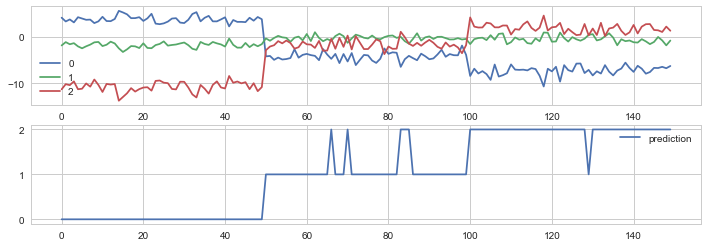

In [7]:
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model1.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

- 판별함수 값이 0보다 큰 경우의 클래스를 선택하고, 여러 개의 클래스에서 0보다 클 경우에는 판별함수 값이 큰 class를 선택하면 된다.

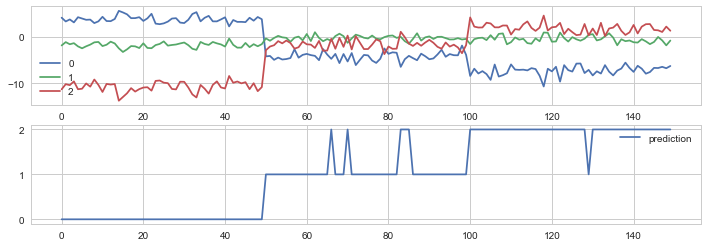

In [8]:
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(211)
pd.DataFrame(model2.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model2.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

OvR보다 OvO 방법을 이용하면 더 정확한 결과를 얻을 수 있다.

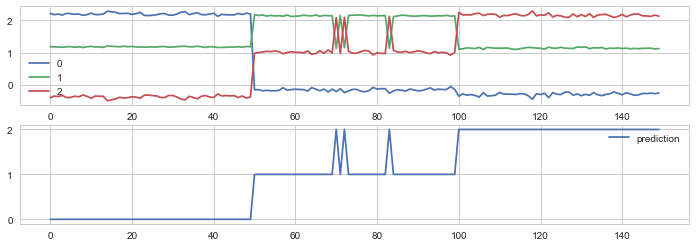

In [9]:
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(211)
pd.DataFrame(model3.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model3.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

Label Binarizer는 y 즉 종속변수의 클래스를 one-hot-encoding 하기 위한 명령이다. 이렇게 하면 각 열은 OvR 문제를 풀기위한 y 값이 된다.